# Storytelling with Data Visualization

##### Reference: https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization
##### Data Source: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

## What will you learn from this project?
<div style="text-align: center;">
    <img src="ProjectOverview.png" alt="Alt Text" style="width: 50%; height: auto;">
</div>

## Introduction
**In this data analysis project, we intend to use analysis techniques and visualization to select feature for some Breast Cancer detection and classification tasks.** Feature selection with correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification. Apart from these, principle component analysis are used to observe number of components and lower down the demension of the dataset. 

Enjoy the contents below!!!

## Data Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Visualization](#4)
1. [Feature Selection and Random Forest Classification](#5)
    1. [Feature selection with correlation and random forest classification](#6)
    1. [Univariate feature selection and random forest classification](#7)
    1. [Recursive feature elimination (RFE) with random forest](#8)
    1. [Recursive feature elimination with cross validation and random forest classification](#9)
    1. [Tree based feature selection and random forest classification](#10)
1. [Feature Extraction with PCA](#11)
1. [Conclusion](#12)

<a id='1'></a>
## Python Libraries
* We import necessary libraries in the cell below.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

<a id='2'></a>
## Data Content
1. **ID number**
1. **Diagnosis (M = malignant, B = benign)**
1. **radius (mean of distances from center to points on the perimeter)**
1. **texture (standard deviation of gray-scale values)**
1. **perimeter**
1. **area**
1. **smoothness (local variation in radius lengths)**
1. **compactness (perimeter^2 / area - 1.0)**
1. **concavity (severity of concave portions of the contour)**
1. **concave points (number of concave portions of the contour)**
1. **symmetry**
1. **fractal dimension ("coastline approximation" - 1)**
<br>
* The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
* All feature values are recoded with four significant digits.
* Missing attribute values: none
* Class distribution: 357 benign, 212 malignant

<a id='3'></a>
## Read and Analyse Data

In [2]:
data = pd.read_csv('../../data/Cancer_data.csv')

In [3]:
# head method show only first 5 rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**There are 4 things that take my attention**
1) There is an **id** that makes nonsense to be used for classificaiton 
2) **Diagnosis** is our class category
3) **Unnamed: 32** feature includes NaN so we do not need it.
4) **Blackbox Theory:** I do not fully understand about other features because I have no medical background. And AI only cares about the data not the feature names.

Therefore, drop these unnecessary features. However, please note dropping off the unnecessary features is a feature selection. This is more to be data clearning. Indeed, we didn't affect any of the information that the dataset contained. 

In [4]:
# feature names as a list
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
dropingFeatures = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(dropingFeatures, axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


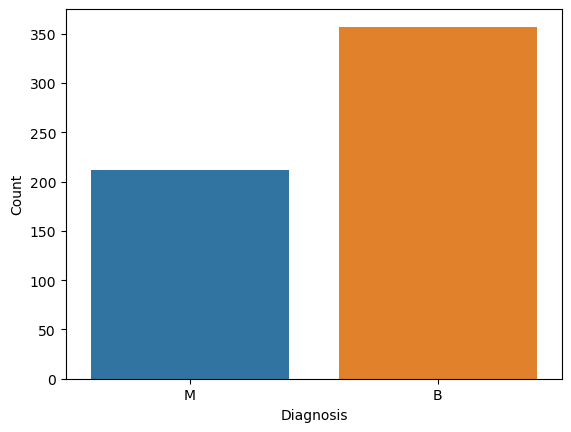

In [6]:
ax = sns.countplot(x = y, label = "Count")       # M = 212, B = 357
counts = y.value_counts()
B, M = counts.values
ax.set_xlabel(ax.get_xlabel().capitalize())
ax.set_ylabel(ax.get_ylabel().capitalize())
print('Number of Benign: ', B)
print('Number of Malignant : ', M)

Okey, now we have features but **what do they mean for classification** or actually **how much do we need to know about these features for classification**
The answer is that we do not need to know meaning of these features however in order to imagine in our mind we should know something like variance, standart deviation, number of sample (count) or max min values. In reality, data distribution is a crucial for any data analytic task. 
These type of information helps to understand about what is going on data. For example, the question is appeared in my mind the **area_mean** feature's max value is 2500 and **smoothness_mean** features' max 0.16340. Therefore **do we need standardization or normalization before visualization, feature selection, feature extraction or classificaiton?** The answer is yes and no not surprising ha :) Anyway lets go step by step and start with visualization.  

In [7]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<a id='4'></a>
## Visualization
In order to visualizate data we are going to use seaborn plots that is not previously used to inform you and for diversity of plots. What I use in real life is mostly violin plot and swarm plot. Do not forget we are not selecting feature, we are trying to know data like looking at the drink list at the pub door.

A violin plot is used to visualize the distribution of the data and its probability density. It is particularly effective when you have a large dataset. On the other hand, a swarm plot is used to show the distribution of categorical data with respect to a continuous variable. It displays individual data points along the categorical axis. Both plots are useful for visualizing distributions, but they serve slightly different purposes.

Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

Text(0, 0.5, 'Value')

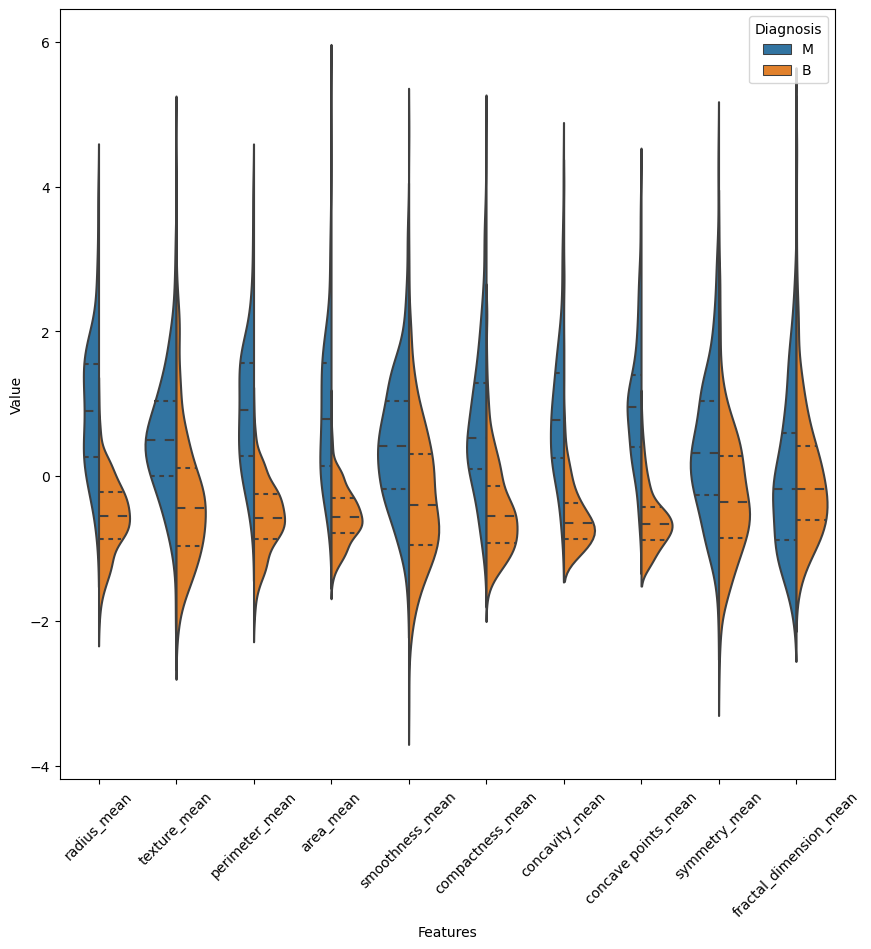

In [8]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data, id_vars = "diagnosis",
                     var_name = "features",
                     value_name = 'value')
plt.figure(figsize=(10, 10))
sns.violinplot(x= "features" , y = "value", hue = "diagnosis", data = data, split = True, inner = "quart")
plt.xticks(rotation = 45)

# Get the legend
legend = plt.legend()
# Capitalize legend title
legend.set_title("Diagnosis".capitalize())

# Capitalize x-axis label
plt.xlabel("Features".capitalize())

# Capitalize y-axis label
plt.ylabel("Value".capitalize())

Lets interpret the plot above together. For example, in **texture_mean** feature, median of the *Malignant* and *Benign* looks like separated so it can be good for classification. However, in **fractal_dimension_mean** feature,  median of the *Malignant* and *Benign* does not looks like separated so it does not gives good information for classification.

Text(0, 0.5, 'Value')

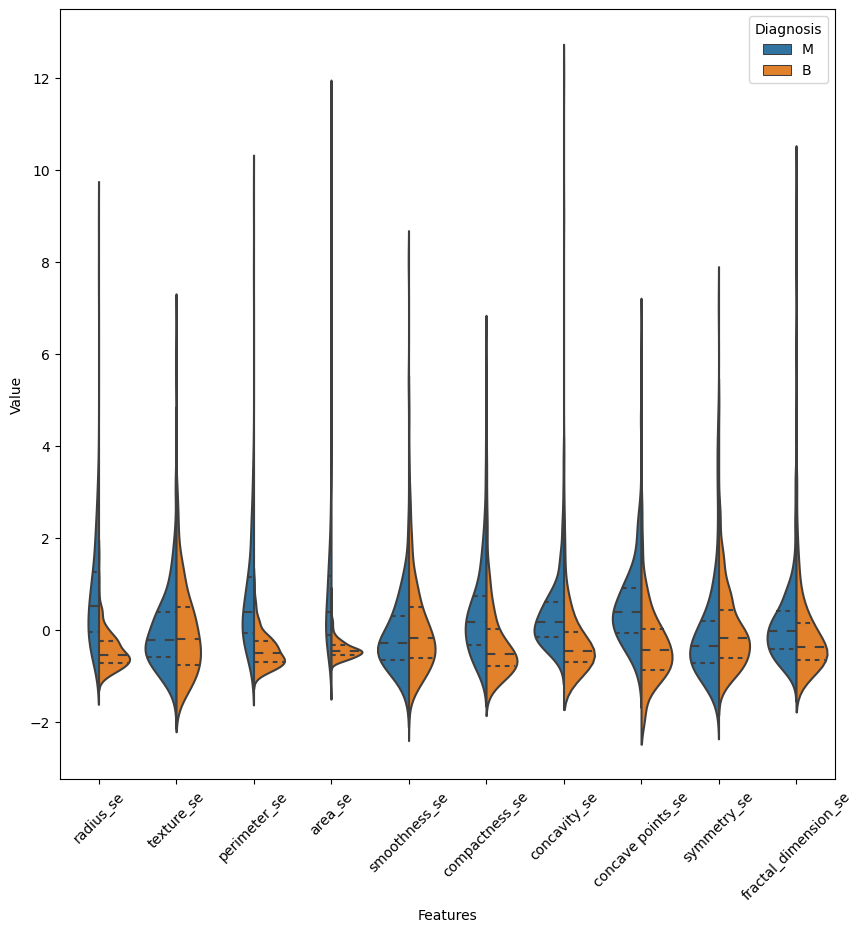

In [9]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:, 10:20]],axis = 1)
data = pd.melt(data,id_vars = "diagnosis",
                    var_name = "features",
                    value_name = 'value')
plt.figure(figsize=(10, 10))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation = 45)

# Get the legend
legend = plt.legend()
# Capitalize legend title
legend.set_title("Diagnosis".capitalize())

# Capitalize x-axis label
plt.xlabel("Features".capitalize())

# Capitalize y-axis label
plt.ylabel("Value".capitalize())

Text(0, 0.5, 'Value')

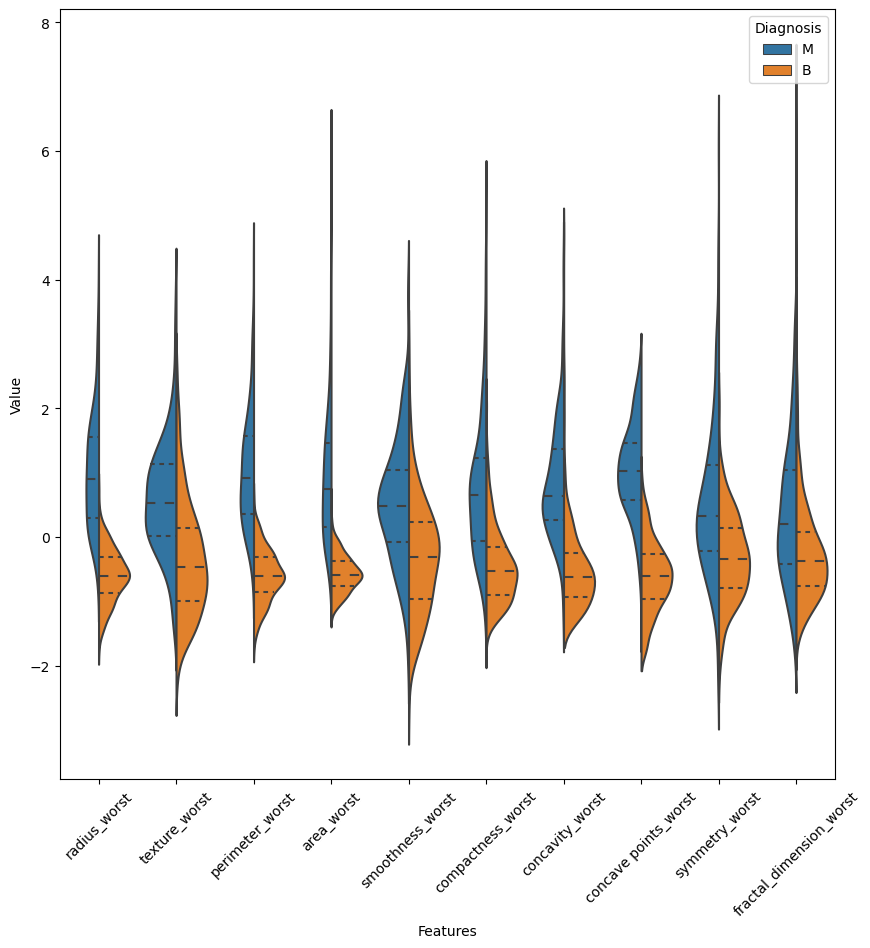

In [10]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:, 20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation = 45)

# Get the legend
legend = plt.legend()
# Capitalize legend title
legend.set_title("Diagnosis".capitalize())

# Capitalize x-axis label
plt.xlabel("Features".capitalize())

# Capitalize y-axis label
plt.ylabel("Value".capitalize())

Text(0, 0.5, 'Value')

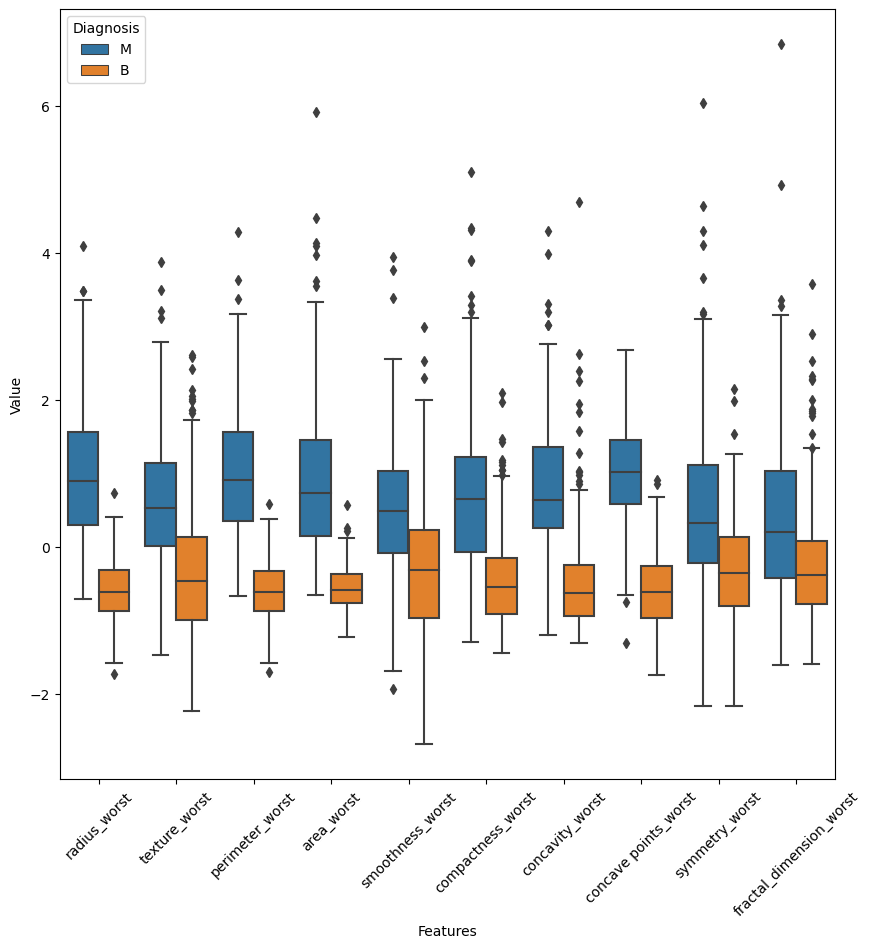

In [11]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10, 10))
sns.boxplot(x = "features", y = "value", hue="diagnosis", data=data)
plt.xticks(rotation = 45)

# Get the legend
legend = plt.legend()
# Capitalize legend title
legend.set_title("Diagnosis".capitalize())

# Capitalize x-axis label
plt.xlabel("Features".capitalize())

# Capitalize y-axis label
plt.ylabel("Value".capitalize())

Lets interpret one more thing about plot above, variable of **concavity_worst** and **concave point_worst** looks like similar but how can we decide whether they are correlated with each other or not.
(Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated.
 Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. 
Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

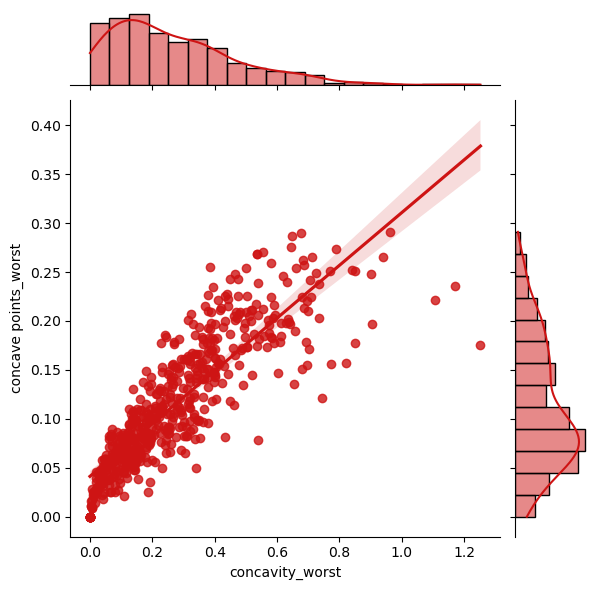

In [12]:
sns.jointplot(x='concavity_worst', y='concave points_worst', data=x, kind='reg', color='#ce1414')
plt.show()

What about three or more feauture comparision ? For this purpose we can use pair grid plot. Also it seems very cool :)
And we discover one more thing **radius_worst**, **perimeter_worst** and **area_worst** are correlated as it can be seen pair grid plot. We definetely use these discoveries for feature selection.

<Figure size 1000x1000 with 0 Axes>

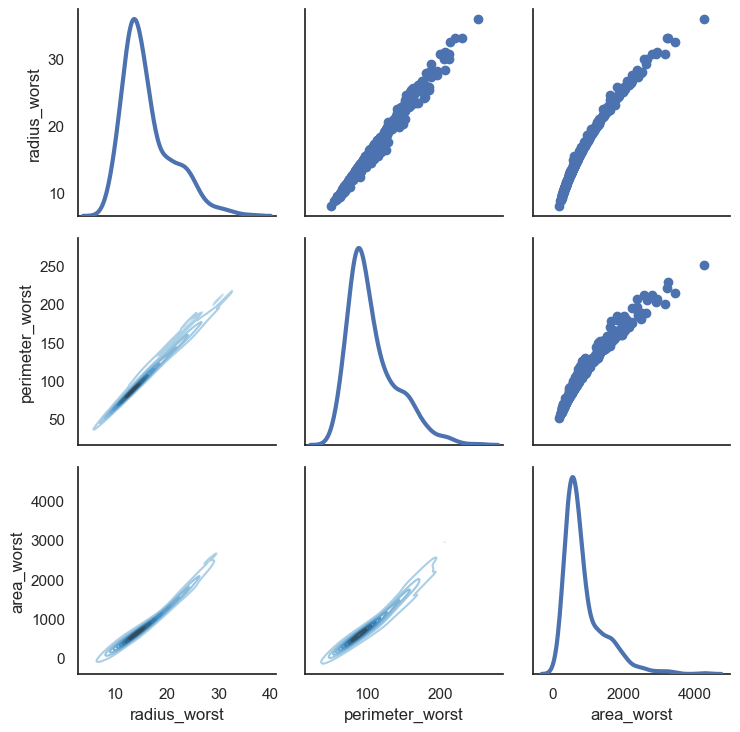

In [13]:
plt.figure(figsize=(10, 10))
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Up to this point, we make some comments and discoveries on data already. If you like what we did, I am sure swarm plot will be your favor too. 

In swarm plot, I will do three part like violin plot not to make plot very complex in appearance. 

C:\Users\yjyzx\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yjyzx\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yjyzx\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yjyzx\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yjyzx\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points ca

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

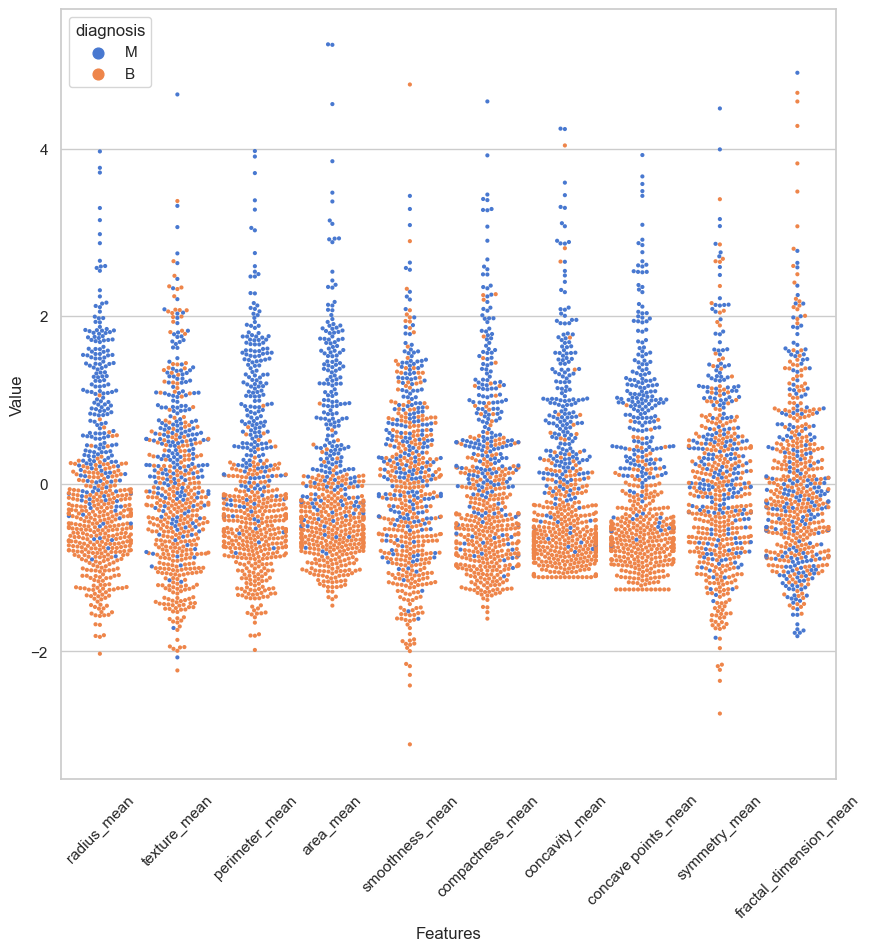

In [14]:
sns.set(style = "whitegrid", palette = "muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x = "features", y = "value", hue = "diagnosis", data=data, size=3)

# Capitalize x-axis label
plt.xlabel("Features".capitalize())

# Capitalize y-axis label
plt.ylabel("Value".capitalize())

plt.xticks(rotation=45)

### Due to the size of the dataset, violin plot may have the warning messages. The alternative solution can be downsize the dots or using stripplot.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

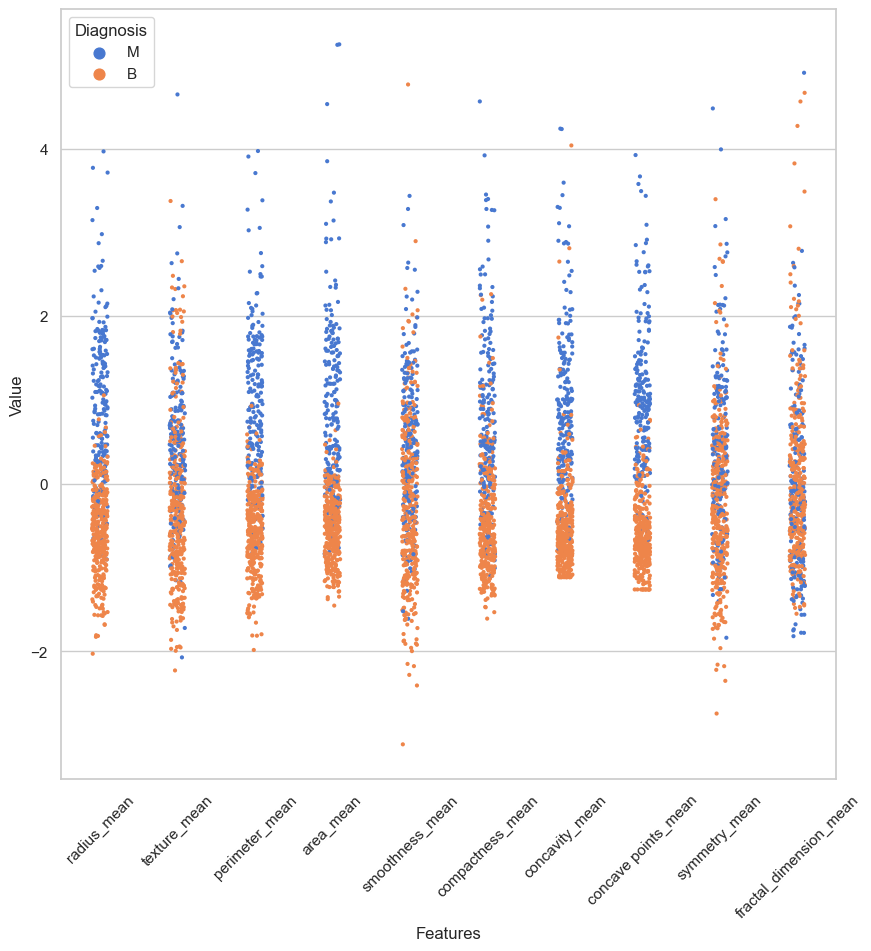

In [15]:
sns.set(style = "whitegrid", palette = "muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.stripplot(x = "features", y = "value", hue = "diagnosis", data=data, size=3)

# Get the legend
legend = plt.legend()
# Capitalize legend title
legend.set_title("Diagnosis".capitalize())

# Capitalize x-axis label
plt.xlabel("Features".capitalize())

# Capitalize y-axis label
plt.ylabel("Value".capitalize())

plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

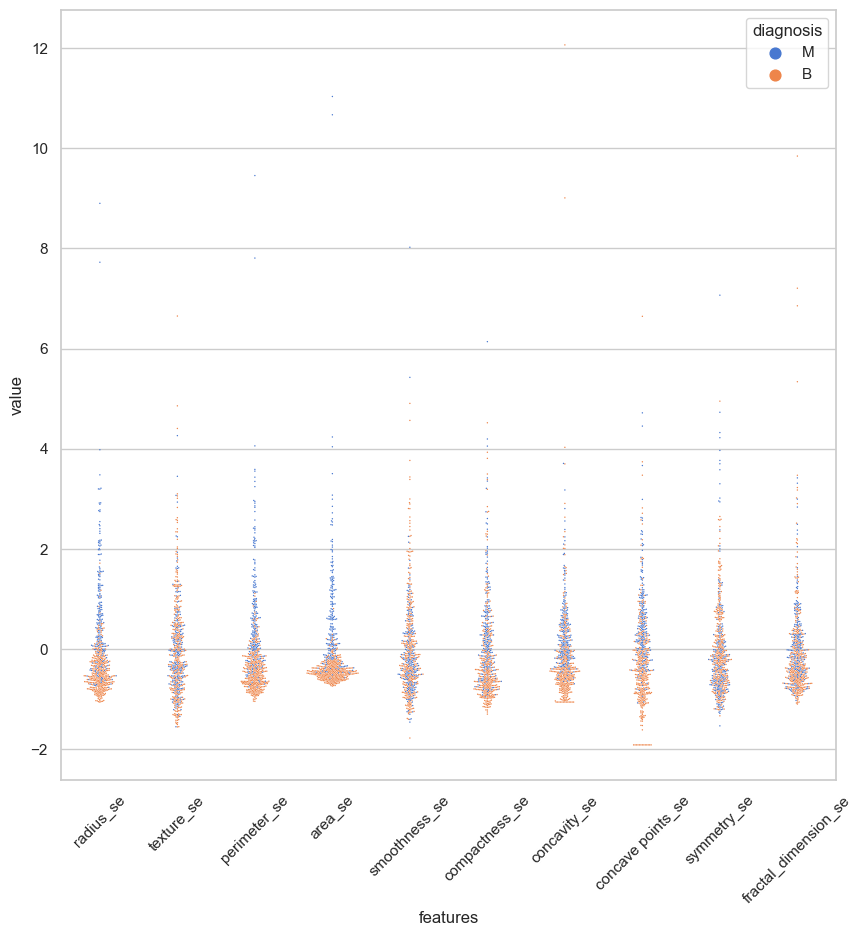

In [16]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data = data, size = 1)
plt.xticks(rotation = 45)

swarm plot time:  1.4310579299926758  s


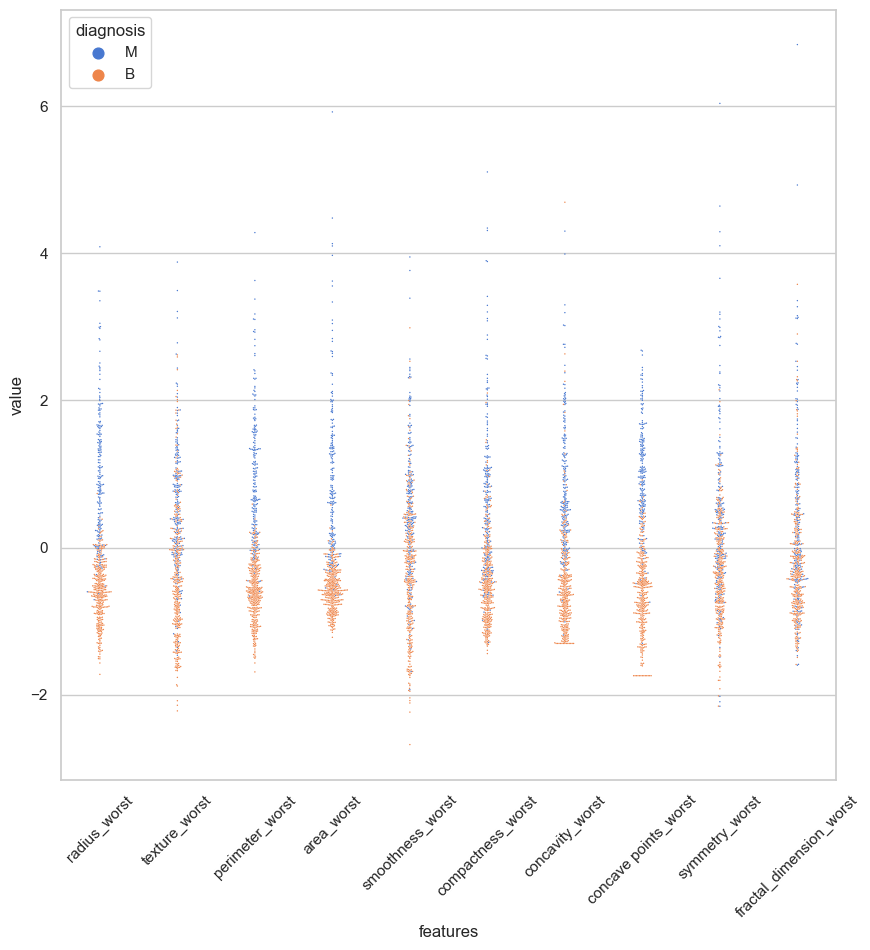

In [17]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size = 1)
toc = time.time()
plt.xticks(rotation=45)
print("swarm plot time: ", toc-tic ," s")

They looks cool right. And you can see variance more clear. Let me ask you a question, **in these three plots which feature looks like more clear in terms of classification.** In my opinion **area_worst** in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, **smoothness_se** in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

**What if we want to observe all correlation between features?** 

Yes, you are right. The answer is heatmap that is out of date but powerful plot method.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 [Text(0.5, 0, 'radius_mean'),
  Text(1.5, 0, 'texture_mean'),
  Text(2.5, 0, 'perimeter_mean'),
  Text(3.5, 0, 'area_mean'),
  Text(4.5, 0, 'smoothness_mean'),
  Text(5.5, 0, 'compactness_mean'),
  Text(6.5, 0, 'concavity_mean'),
  Text(7.5, 0, 'concave points_mean'),
  Text(8.5, 0, 'symmetry_mean'),
  Text(9.5, 0, 'fractal_dimension_mean'),
  Text(10.5, 0, 'radius_se'),
  Text(11.5, 0, 'texture_se'),
  Text(12.5, 0, 'perimeter_se'),
  Text(13.5, 0, 'area_se'),
  Text(14.5, 0, 'smoothness_se'),
  Text(15.5, 0, 'compactness_se'),
  Text(16.5, 0, 'concavity_se'),
  Text(17.5, 0, 'concave points_se'),
  Text(18.5, 0, 'symmetry_se'),
  Text(19.5, 0, 'fractal_dimension_se'),
  Text(20.5, 0, 'radius_worst'),
  Text(21.5, 0, 'texture_worst'),
  Text(22.5, 0, 'perimeter_worst'),
  Text(23.5

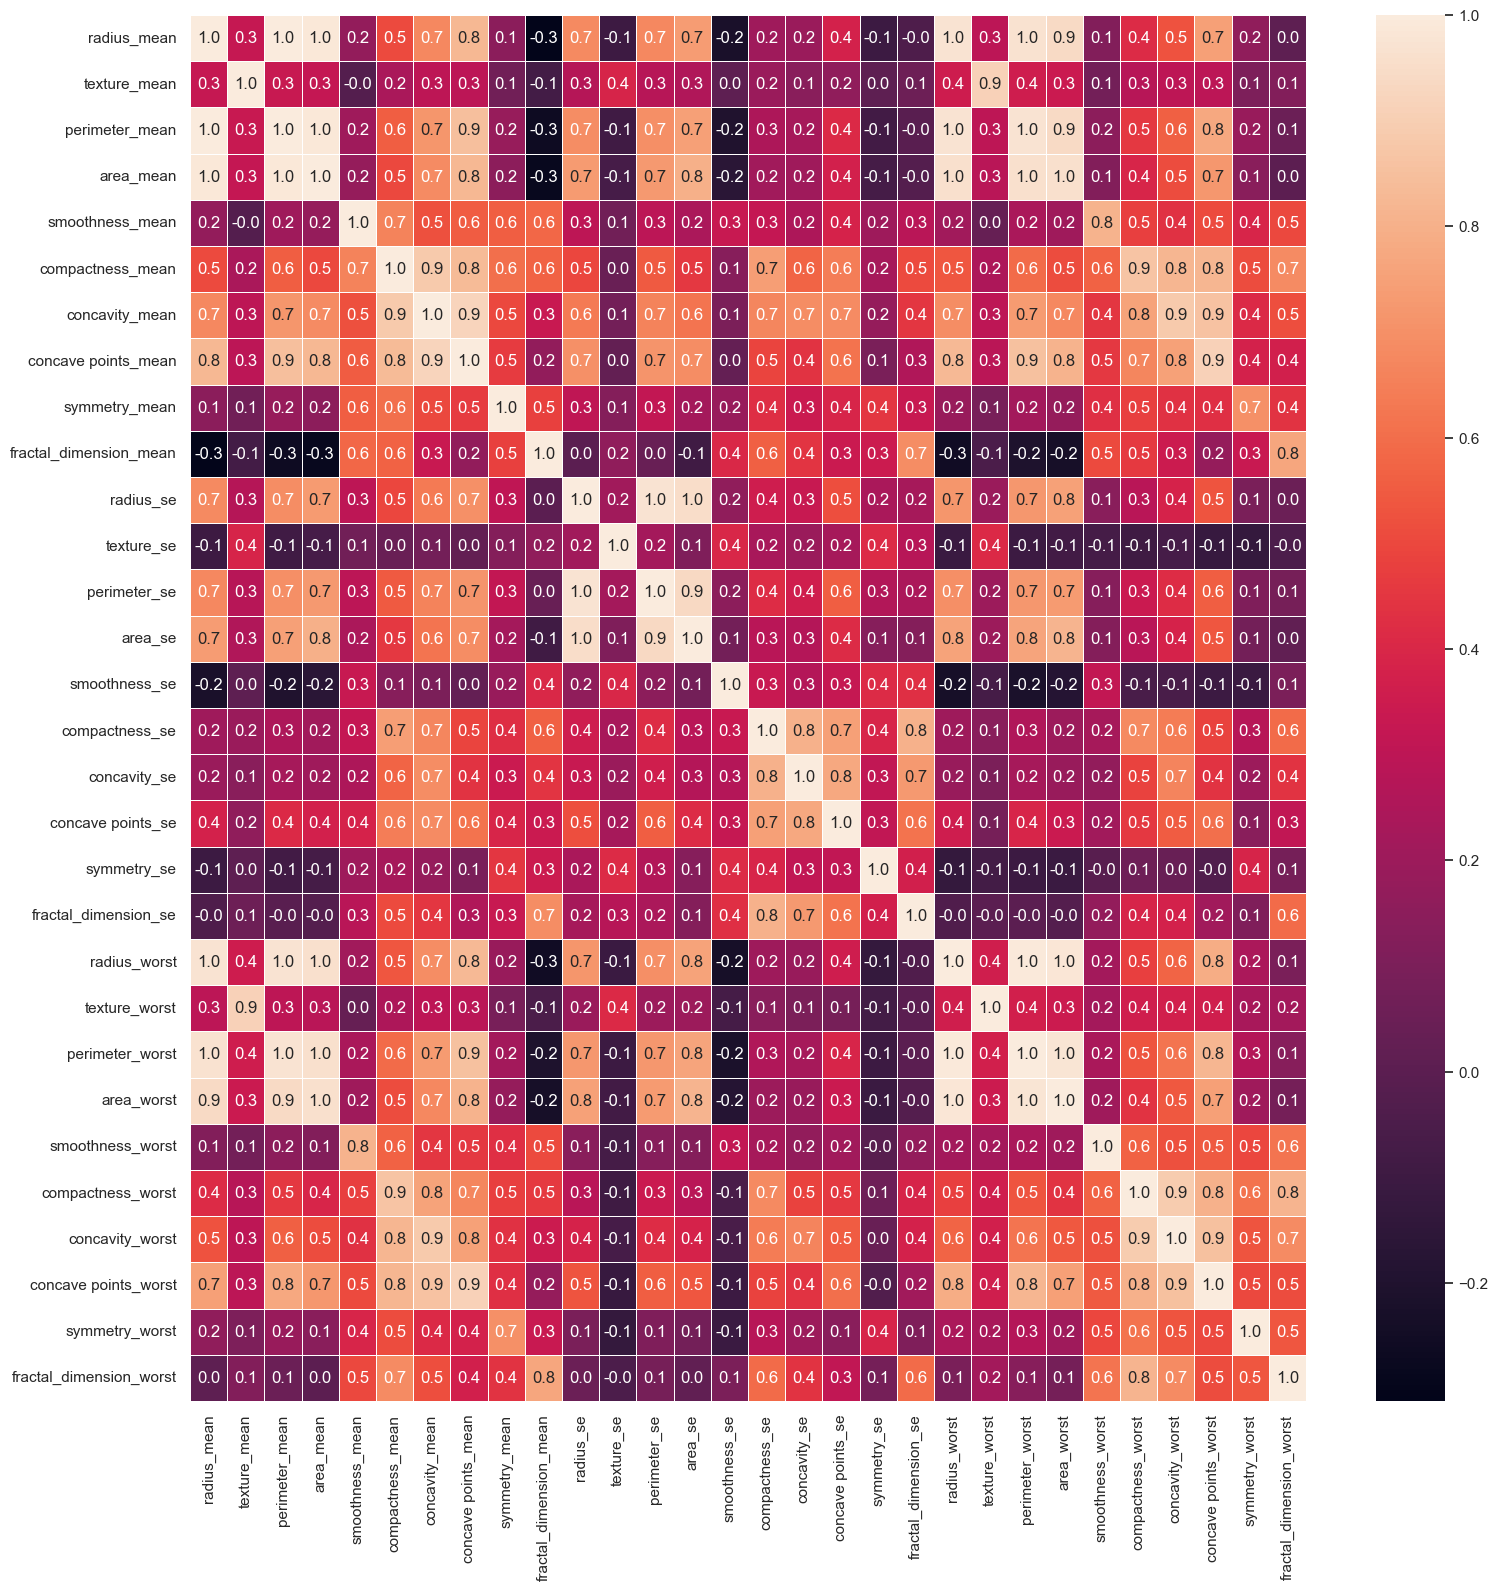

In [18]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(rotation=90)

Well, finaly we are in the pub and lets choose our drinks at feature selection part while using heatmap(correlation matrix).

### Recall our objective---classification tasks:

Highly correlated features in a dataset can sometimes pose challenges for classification models. Here are a few reasons why they might need to be addressed:

1. Redundancy: Highly correlated features can contain redundant information, which might not provide additional value to the model and could potentially lead to overfitting.

2. Model Performance: In some cases, highly correlated features can negatively impact the performance of the model by introducing multicollinearity, which can make it difficult for the model to determine the true relationship between the features and the target variable.

3. Interpretability: Highly correlated features can make it harder to interpret the model results, as it may be unclear which features are driving the predictions.

4. Computational Efficiency: Including highly correlated features can increase the computational complexity of the model without necessarily improving its performance.

<a id='5'></a>
## Feature Selection and Random Forest Classification
Finally, we land ourselves in feature selection. Therefore, we need to ask the model to determine which features we should consider in the classification tasks. 

In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and select. 

<a id='6'></a>
### 1) Feature selection with correlation and random forest classification

As it can be seen in map heat figure **radius_mean, perimeter_mean and area_mean** are correlated with each other so we will use only **area_mean**. If you ask how i choose **area_mean** as a feature to use, well actually there is no correct answer, I just look at swarm plots and **area_mean** looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier. 

**Compactness_mean, concavity_mean and concave points_mean** are correlated with each other.Therefore I only choose **concavity_mean**. Apart from these, **radius_se, perimeter_se and area_se** are correlated and I only use **area_se**.  **radius_worst, perimeter_worst and area_worst** are correlated so I use **area_worst**.  **Compactness_worst, concavity_worst and concave points_worst** so I use **concavity_worst**.  **Compactness_se, concavity_se and concave points_se** so I use **concavity_se**. **texture_mean and texture_worst are correlated** and I use **texture_mean**. **area_worst and area_mean** are correlated, I use **area_mean**.




In [19]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
              'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

<AxesSubplot:>

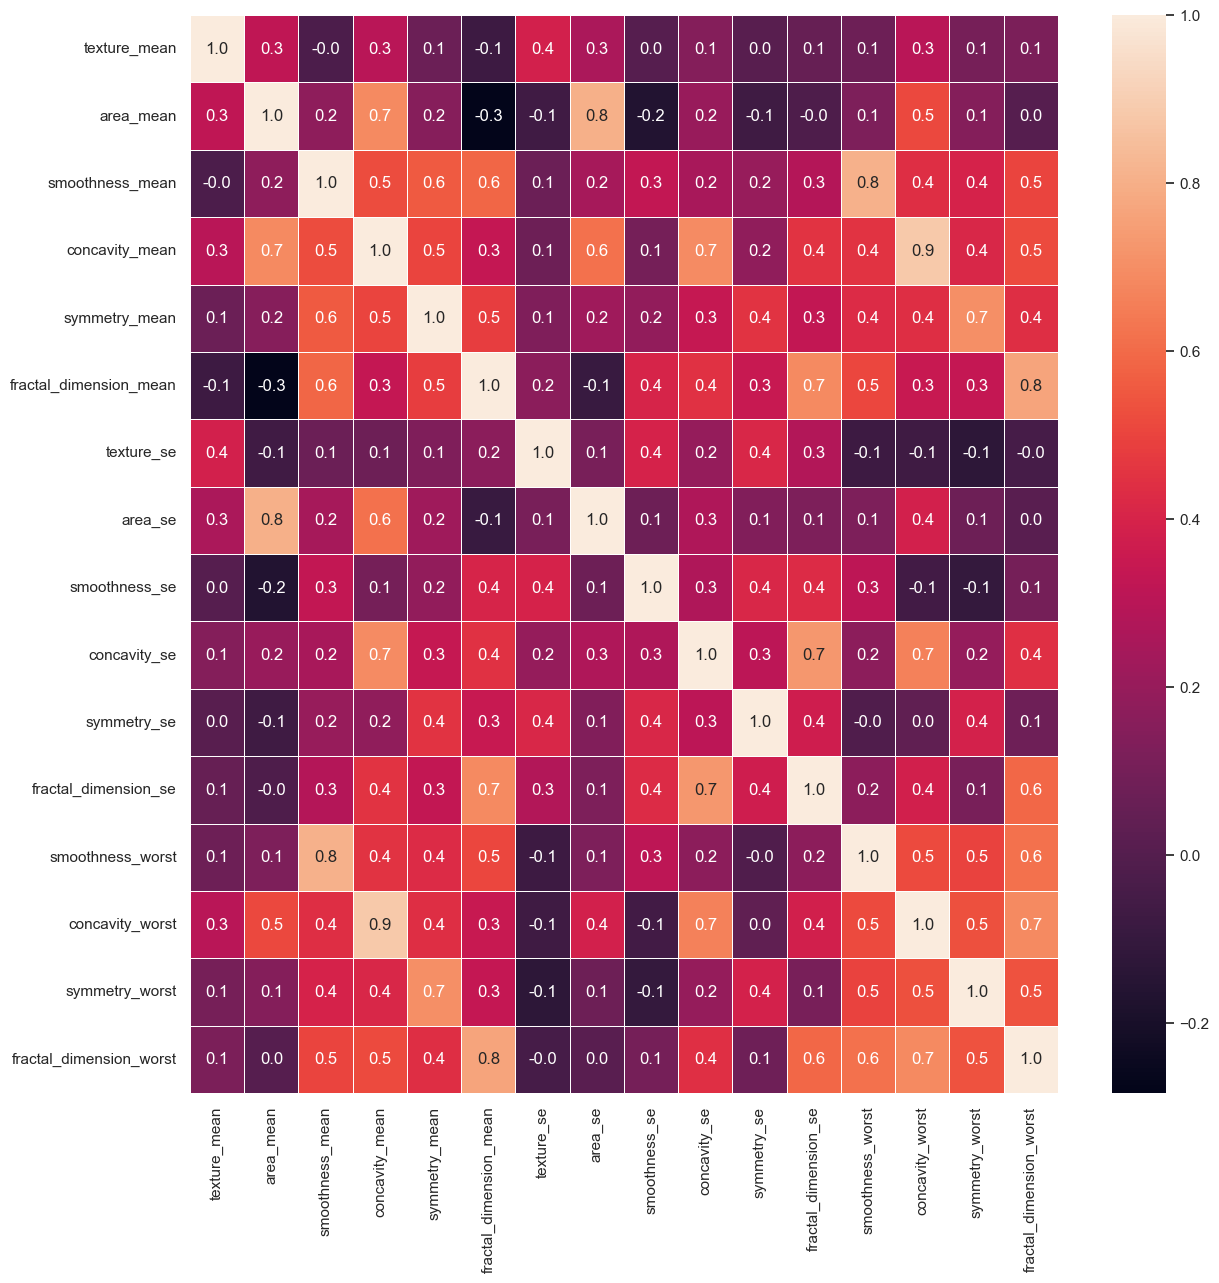

In [20]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, we choose our features but **did we choose correctly ?** Lets use random forest and find accuracy according to chosen features.

Accuracy is:  0.9649122807017544


<AxesSubplot:>

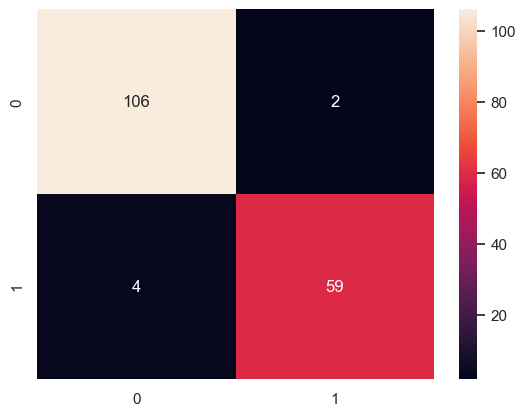

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is almost 97% and as it can be seen in confusion matrix, we make few wrong prediction. 
Now lets see other feature selection methods to find better results.

<a id='7'></a>
### 2) Univariate feature selection and random forest classification
In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features.
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest>

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [23]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Best 5 feature to classify is that **area_mean, area_se, texture_mean, concavity_worst and concavity_mean**. So lets se what happens if we use only these best scored 5 feature.

Accuracy is:  0.9473684210526315


<AxesSubplot:>

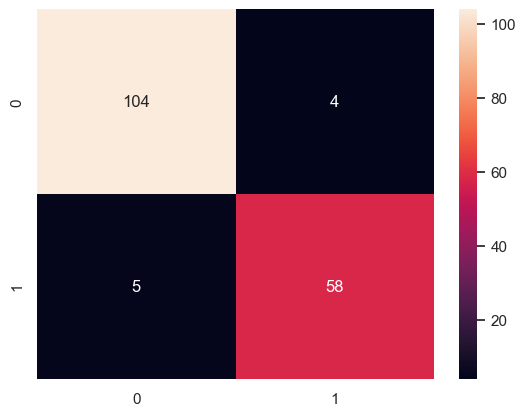

In [24]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 5 features in selectkBest method accuracies look similar.
Now lets see other feature selection methods to find better results.

<a id='8'></a>
### 3) Recursive feature elimination (RFE) with random forest
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html>
Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 5 features. However, which 5 features will we use ? We will choose them with RFE method.

In [25]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)


In [26]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


Chosen 5 best features by rfe is **texture_mean, area_mean, concavity_mean, area_se, concavity_worst**. They are exactly similar with previous (selectkBest) method. Therefore we do not need to calculate accuracy again. Shortly, we can say that we make good feature selection with rfe and selectkBest methods. However as you can see there is a problem, okey I except we find best 5 feature with two different method and these features are same but why it is **5**. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how many feature we need to use with rfecv method.

<a id='9'></a>
### 4) Recursive feature elimination with cross validation and random forest classification
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html>
Now we will not only **find best features** but we also find **how many features do we need** for best accuracy.

In [27]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv = 5, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Finally, we find best 11 features that are **texture_mean, area_mean, concavity_mean, texture_se, area_se, concavity_se, symmetry_se, smoothness_worst, concavity_worst, symmetry_worst and fractal_dimension_worst** for best classification. Lets look at best accuracy with plot.


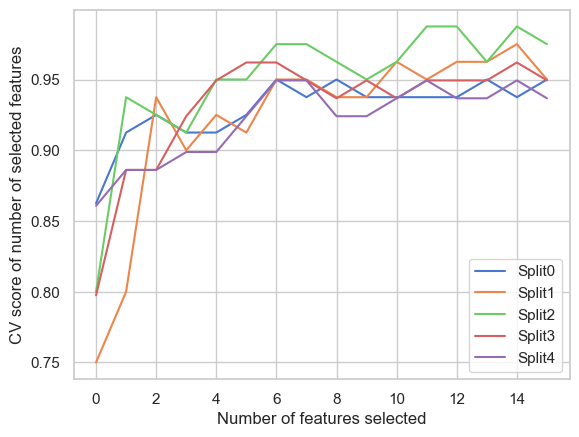

In [60]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
split = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
splitResults = [rfecv.cv_results_[keys] for keys in split]
for i in range(len(splitResults)):
    plt.plot(splitResults[i], label = "Split" + str(i))

plt.legend()
plt.xlabel("Number of features selected")
plt.ylabel("CV score of number of selected features")
plt.show()

Lets look at what we did up to this point. Lets accept that guys this data is very easy to classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning how to make **feature selection and understanding data.** Then last make our last feature selection method.

<a id='10'></a>
### 5) Tree based feature selection and random forest classification
<http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>
In random forest classification method there is a **feature_importances_** attributes that is the feature importances (the higher, the more important the feature). **!!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.**


Feature ranking:
1. feature 1 (0.286054)
2. feature 3 (0.246765)
3. feature 9 (0.102139)
4. feature 13 (0.084220)
5. feature 7 (0.053392)
6. feature 0 (0.046520)
7. feature 14 (0.046139)
8. feature 2 (0.025648)
9. feature 11 (0.022892)
10. feature 12 (0.020082)
11. feature 15 (0.015871)
12. feature 5 (0.015083)
13. feature 8 (0.014119)
14. feature 10 (0.011017)
15. feature 6 (0.007833)
16. feature 4 (0.002227)


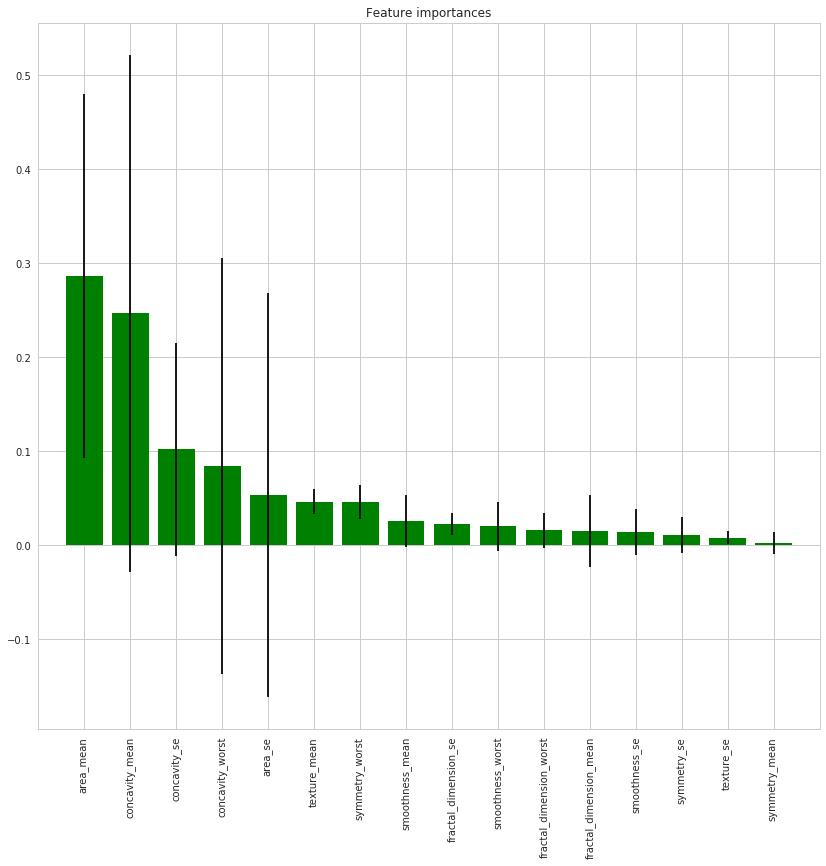

In [28]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

As you can seen in plot above, after 5 best features importance of features decrease. Therefore we can focus these 5 features. As I sad before, I give importance to understand features and find best of them. 

<a id='11'></a>
## Feature Extraction with PCA
<http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>
We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.
 

Text(0,0.5,'explained_variance_ratio_')

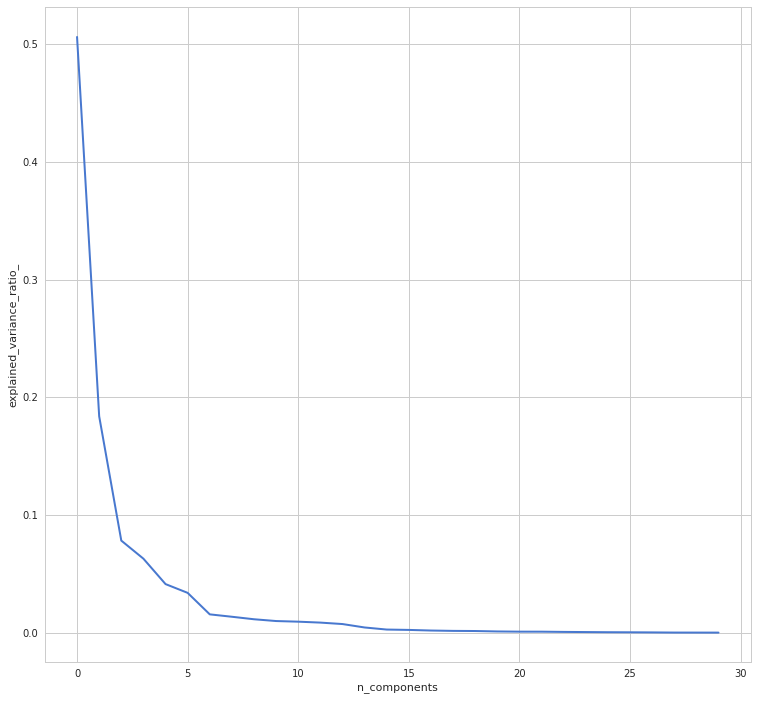

In [29]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

* According to variance ration, 3 component can be chosen.
* If you have any doubt about PCA, you can check my intuitive way of PCA tutorial.

<a id='12'></a>
# Conclusion
Shortly, I tried to show importance of feature selection and data visualization. 
Default data includes 33 feature but after feature selection we drop this number from 33 to 5 with accuracy 95%. In this kernel we just tried basic things, I am sure with these data visualization and feature selection methods, you can easily ecxeed the % 95 accuracy. Maybe you can use other classification methods.
### I hope you enjoy in this kernel
## If you have any question or advise, I will be apreciate to listen them ...